In [1]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt

from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

from Benchmark import dataset
import segmentation_models_pytorch as smp
from methods import unet
import numpy as np

In [2]:
def ploting(image, x, title):
    fig, axes = plt.subplots(1, 4, figsize=(12, 5))  # 1 row, 2 columns
    fig.suptitle(title, fontsize=16)

    axes[0].imshow(image[0][0])  
    axes[0].axis('off')  
    axes[0].set_title('T1-weighted') 


    axes[1].imshow(x[0][0])  
    axes[1].axis('off')  
    axes[1].set_title('Necrotic') 

    axes[2].imshow(x[0][1])  
    axes[2].axis('off')  
    axes[2].set_title('Edema') 

    axes[3].imshow(x[0][2])  
    axes[3].axis('off')  
    axes[3].set_title('Tumour') 


    # Show the plot
    plt.tight_layout()  # Adjusts the layout to prevent overlap
    plt.show()

In [3]:
def segment(image, model):
  with torch.inference_mode():
    prediction = model(image)
    return torch.sigmoid(prediction)

Arguments

In [4]:
device = 'cpu'
load_path = './saved_model/pretrain-unet-efficientnet.pth'  #

Load Model

In [5]:
# model = unet.UNet(n_channels=3, n_classes=3, bilinear=False).to(device)
model = unet.pre_train_unet(in_channels=4, classes=4, encoder_name='efficientnet-b1').to(device)

sate = torch.load(load_path)
model.load_state_dict(sate['state_dict'])

<All keys matched successfully>

Testing the model

torch.Size([3, 240, 240])


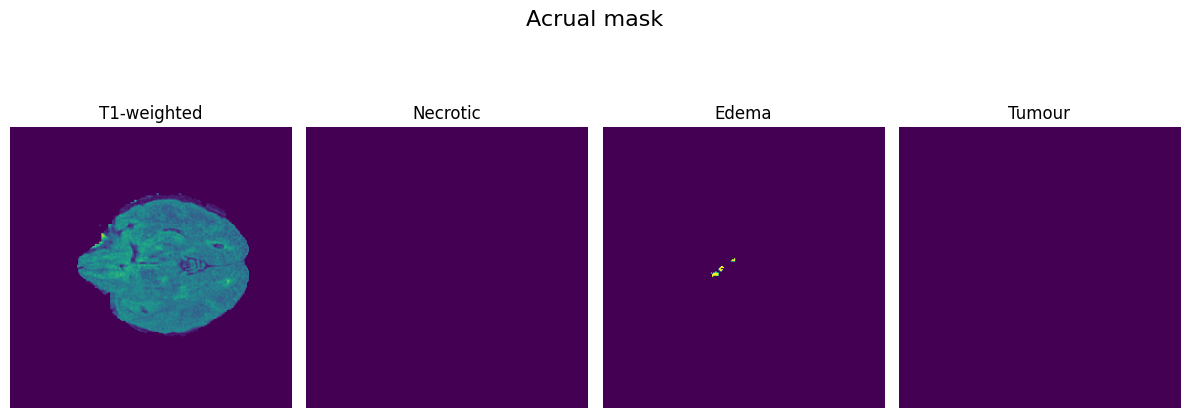

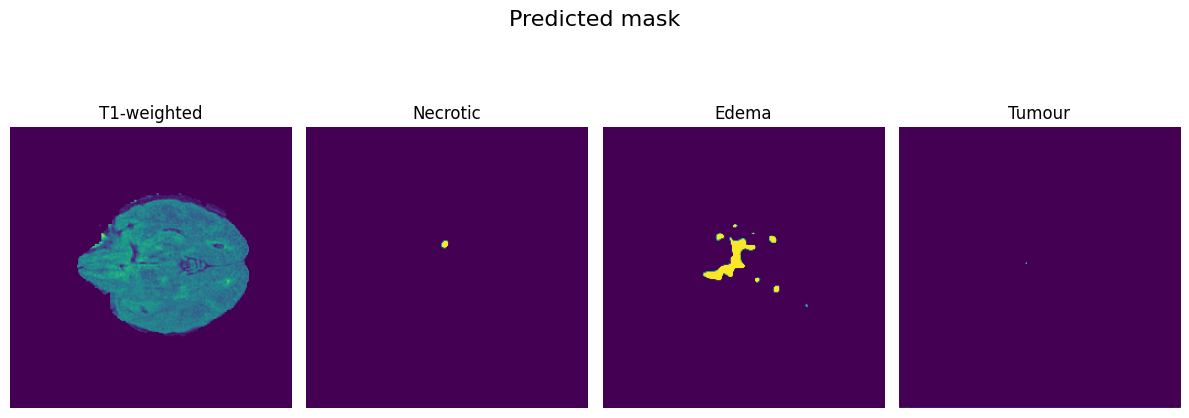

In [15]:
test_batch_size = 1
test_loader = dataset.BraTS20(root='./Benchmark', mode='test', mini=False, memory=False)(batch_size=test_batch_size)
image, mask= next(iter(test_loader))

output = segment(image, model)


ploting(image, mask, 'Acrual mask')
ploting(image, output, 'Predicted mask')